<a href="https://colab.research.google.com/github/HansHenseler/masdav2022/blob/main/Part_2_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Analysis introduction

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2022

This exercise starts with examples of most common data analysis tasks with Python, from the features of Python itself to using modules like Pandas with a few exercises that you can try to accomplish yourself.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

# we need to upgrade the plotly version that is pre-installed in Google Colab
#
!pip install --upgrade plotly

import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 7.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [2]:
mydateparser = lambda x: dt.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')
eventlog = pd.read_csv(
    "mus2019_win_security_evtx.csv", 
    sep=",",usecols=[0,1,2,3,4,5],
    header=0,
    names=['Level','Date and Time','Source','Event ID','Task Category','Information'], 
    dtype={'Event ID':str},
    parse_dates = ['Date and Time'],
    date_parser=mydateparser,
    index_col='Date and Time'
    )             

In [ ]:
eventlog.head()

,Level,Source,Event ID,Task Category,Information
Date and Time,,,,,
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4672,Special Logon,Special privileges assigned to new logon.\r\n\...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:28:46,Information,Microsoft-Windows-Security-Auditing,4798,User Account Management,A user's local group membership was enumerated...


# Part 2 Answers

## 1 Create a histogram of the Task Category values. Which category occcurs most often?

In [3]:
# 1a Count the values so you get an idea
#
eventlog['Task Category'].value_counts()

Audit Policy Change             6105
Logon                           2788
Special Logon                   2517
Security Group Management       1027
System Integrity                1021
Other System Events              371
User Account Management          282
Logoff                           197
Process Creation                 168
Security State Change            100
Authentication Policy Change      18
Other Policy Change Events        14
Service shutdown                  13
Name: Task Category, dtype: int64

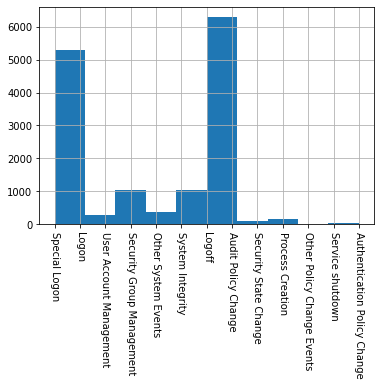

In [5]:
# 1b Histogram visualisation
#
eventlog['Task Category'].hist(xrot=-90)

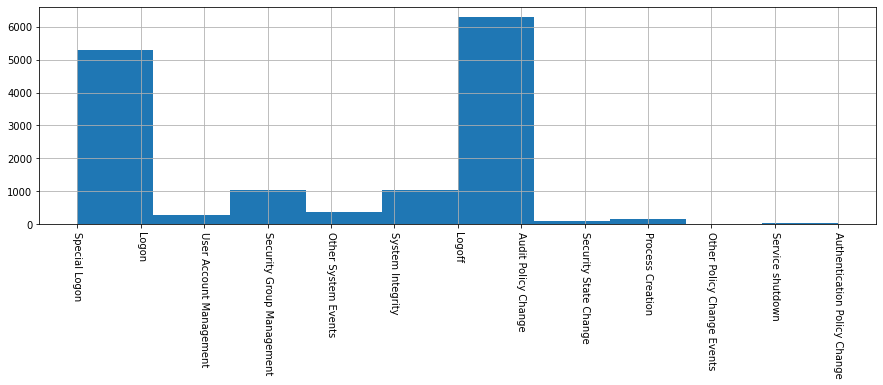

In [ ]:
# if you find  this graph to narrow you can resize it by setting the figsize attribute
#

eventlog['Task Category'].hist(xrot=-90, figsize =(15,4))

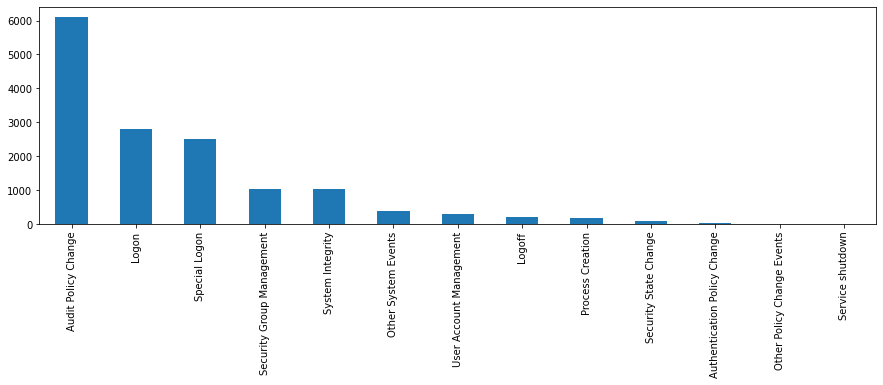

In [6]:
# 1c As a bar plot
#
# Your answer

eventlog['Task Category'].value_counts().plot.bar(figsize =(15,4))

## 2 Create a heatmap visualising number of entries per day with hours vertical

Hint: the date time object can be split in year month day and hours and use the Searborn heatmap

In [7]:
eventlog.index.hour.value_counts()

3     6160
21    1165
4     1057
9      698
2      678
23     460
10     453
5      443
12     397
19     390
1      380
13     357
20     266
22     226
0      200
15     182
16     180
11     171
7      167
8      150
6      133
17     124
18     124
14      60
Name: Date and Time, dtype: int64

In [8]:
eventlog_dates = pd.pivot_table( eventlog, index=[eventlog.index.date], aggfunc="count")['Event ID']
eventlog_dates


2018-07-28    3162
2018-12-28       9
2018-12-29    2442
2018-12-30      30
2018-12-31      49
              ... 
2019-03-15     124
2019-03-16      91
2019-03-17      99
2019-03-18     238
2019-03-20     195
Name: Event ID, Length: 83, dtype: int64

In [15]:

eventlog_by_day_hour = pd.pivot_table( eventlog, fill_value=0.0, columns=[eventlog.index.date], index=[eventlog.index.hour], aggfunc="count")['Event ID']

In [14]:
eventlog_by_day_hour

Event ID                                              \
              2018-07-28 2018-12-28 2018-12-29 2018-12-30 2018-12-31   
Date and Time                                                          
0                      0          0          0          0          0   
1                      0          0          0          2          8   
2                    133          0        267          0          4   
3                   2218          0       2155         11          8   
4                      0          0          0          8          0   
5                      0          0         13          2          1   
6                      0          0          0          0          0   
7                      0          0          0          0          0   
8                      0          0          0          0          0   
9                    428          0          0          0          0   
10                   383          0          0          0          0   
11                     0          0          0          0          0   
12                     0          0          0          0          5   
13                     0          0          7          7          0   
14                     0          0          0          0          0   
15                     0          0          0          0          0   
16                     0          0          0          0          0   
17                     0          0          0          0          0   
18                     0          0          0          0          0   
19                     0          5          0          0          0   
20                     0          0          0          0          0   
21                     0          0          0          0         12   
22                     0          2          0          0         11   
23                     0          2          0          0          0   

                                                                      ...  \
              2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05  ...   
Date and Time                                                         ...   
0                      2          0          0          0          0  ...   
1                      8          0          0          0          0  ...   
2                      4          0         10         12          6  ...   
3                      4         10          2          2         14  ...   
4                      0          0          0          0          0  ...   
5                      0          0          0          0          0  ...   
6                      0          0          0          0          0  ...   
7                      1          0          2          0          0  ...   
8                      0          0          0          0          0  ...   
9                      0          1          0          0          0  ...   
10                     0          0          0          0          0  ...   
11                     0          0          3          1          0  ...   
12                     7          0          0          0          0  ...   
13                     0          7          5          7          6  ...   
14                     0          0          0          0          0  ...   
15                     8          0          0          0          4  ...   
16                     0          0          0          0          0  ...   
17                     0          0          0          0          0  ...   
18                     0          0          0          0          0  ...   
19                     0          0          0          2          0  ...   
20                     0          0          8          0          0  ...   
21                     0          0         12         18          0  ...   
22                     0          0          0          0          0  ...   
23                     0          0          0          0          0 

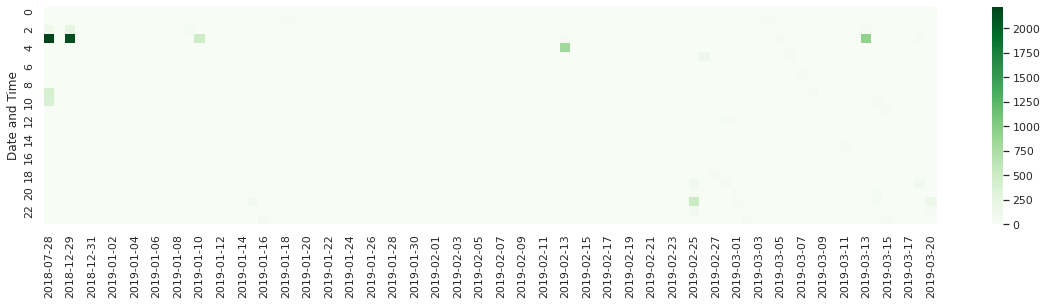

In [11]:
sns.set(rc = {'figure.figsize':(20,4)})
sns.heatmap(eventlog_by_day_hour, cmap="Greens")


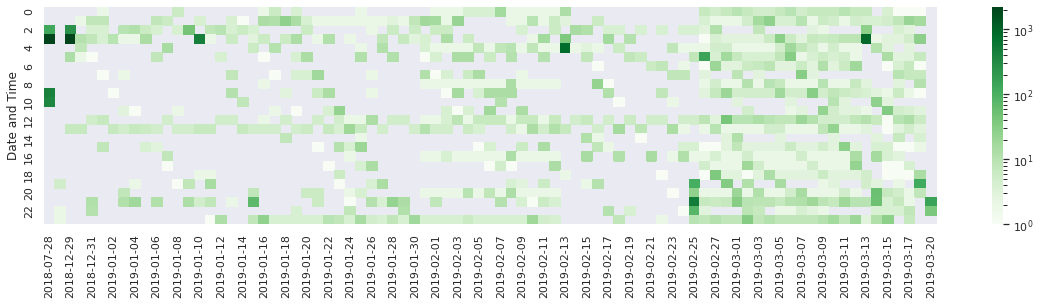

In [12]:
# the colors are vague. We can use the logscale option that seaborn offers
# 
sns.heatmap(eventlog_by_day_hour, cmap="Greens",norm=LogNorm())

## 3 Create a heatmap as in #2 but now only for logoff events


In [16]:
category='Logon'
event_category = eventlog[eventlog['Task Category']==category]
event_category

,Level,Source,Event ID,Task Category,Information
Date and Time,,,,,
2019-03-20 22:53:47,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:37:26,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:18:46,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:15:24,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2019-03-20 22:13:19,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
...,...,...,...,...,...
2018-07-28 09:24:50,Information,Microsoft-Windows-Security-Auditing,4648,Logon,A logon was attempted using explicit credentia...
2018-07-28 09:24:50,Information,Microsoft-Windows-Security-Auditing,4624,Logon,An account was successfully logged on.\r\n\r\n...
2018-07-28 09:24:50,Information,Microsoft-Windows-Security-Auditing,4648,Logon,A logon was attempted using explicit credentia...


In [17]:
event_category_by_day_hour = pd.pivot_table( event_category, fill_value=0.0, columns=[event_category.index.date], index=[event_category.index.hour], aggfunc="count")['Event ID']
event_category_by_day_hour

,2018-07-28,2018-12-28,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,...,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-20
Date and Time,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,0,0,0,0,0
1,0,0,0,1,4,4,0,0,0,0,...,2,1,1,2,1,1,1,5,3,0
2,37,0,81,0,1,1,0,4,5,3,...,0,0,0,7,0,0,1,0,0,0
3,44,0,47,4,4,2,5,1,1,7,...,2,3,3,58,1,1,1,1,6,0
4,0,0,0,4,0,0,0,0,0,0,...,1,1,1,0,4,1,0,1,0,0
5,0,0,5,1,0,0,0,0,0,0,...,2,1,1,0,0,5,1,1,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,6,0,0,0,0,3,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4,1,3,0
8,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,0,2,0


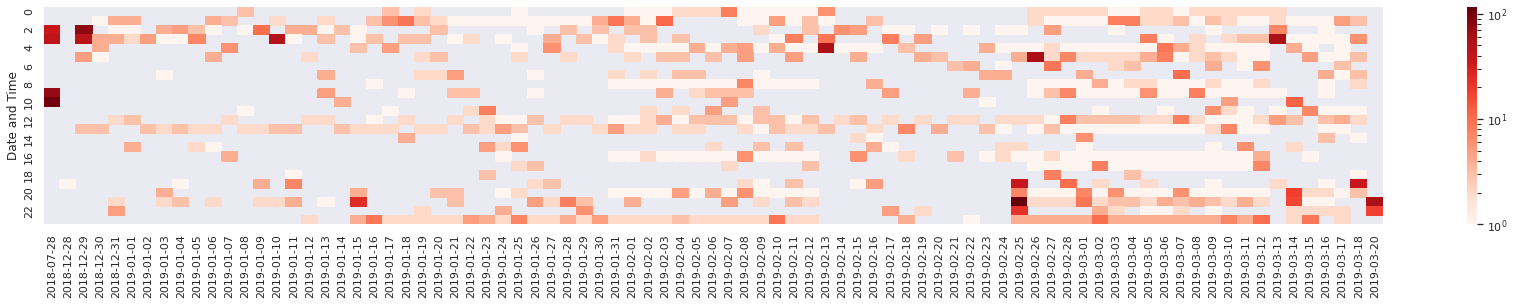

In [18]:
sns.set(rc = {'figure.figsize':(30,4)})
sns.heatmap(event_category_by_day_hour, cmap="Reds",norm=LogNorm())

## 4 Create a treemap visualisation based on the 2nd and 3rd folder in the path using the combined file size

Use the DirPrint_Filelist - clean.xlsx file that you used in part 1 and add the Folders column by splitting the Path column

In [ ]:
# hint: here is a page with help on string splitting https://jakevdp.github.io/WhirlwindTourOfPython/14-strings-and-regular-expressions.html

In [19]:
df = pd.read_excel('DirPrint_Filelist - clean.xlsx')
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]"
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]"
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]"
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]"
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


In [ ]:
df['Folders']=df['Path'].str.split('\\')
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]"
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]"
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]"
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]"
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


In [21]:
df['Folder1'] = df['Folders'].apply(lambda x: x[1] if len(x) >= 3 else '')
df['Folder2'] = df['Folders'].apply(lambda x: x[2] if len(x) >= 4 else '')
df['Folder3'] = df['Folders'].apply(lambda x: x[3] if len(x) >= 5 else '')

In [ ]:
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders,Folder1,Folder2,Folder3
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]",Windows,,
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]",Windows,,
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]",Windows,,
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]",Windows,,
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]",Windows,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf...",Windows,WinSxS,x86_wpf-windowsbase_31bf3856ad364e35_10.0.1920...
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf...",Windows,WinSxS,x86_wpf-windowsbase_31bf3856ad364e35_10.0.1920...
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow....",Windows,WinSxS,x86_wwf-system.workflow.activities_31bf3856ad3...
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow....",Windows,WinSxS,x86_wwf-system.workflow.componentmodel_31bf385...


In [22]:
# since all entries are from the \windows folder we will visualise folder2 and folder3 in the treemap
#
fig = px.treemap(df, path=['Folder2','Folder3'],values='Size',maxdepth=2)
fig.show()


## 5 Create a word cloud on a text that you have selected yourself

In [ ]:
# your answer
#
# hint: Reuse the code from example 8 to get started and find some example text
# questions: 
# Did you run into issues?
# Find any interesting results?
# What about the stop words?

## 6 Do a Benford analysis on the file sizes of the DirPrint_Filelist - clean.xlsx file that we used this morning

In [23]:

# hint: https://en.wikipedia.org/wiki/Benford%27s_law

# let's load the Excel file again 
df = pd.read_excel('DirPrint_Filelist - clean.xlsx')

In [24]:
# Let's do a quick check. Get the size of row 0
df.loc[0].Size

22639

In [28]:
# end see if we can easily get the first character of that number by converting it to a str

str(df.loc[0].Size)[0]

'2'

In [29]:
# that worked.So let's add a column to our df containing this first digit of Size
# not that we're casting the first digit char back to an int so that it will be sorted in the histogram later

df['Digit'] = df['Size'].apply(lambda x: int(str(x)[:1]))

In [30]:
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Digit
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,2
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,7
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,3
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,6
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,7
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,3
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,1
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,3
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,4


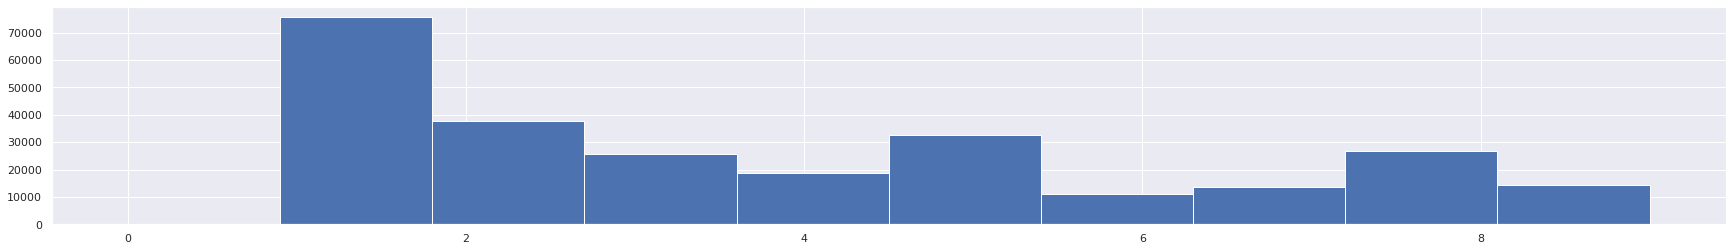

In [31]:
# that looks good. Now make a histogram on Digit

df['Digit'].hist()

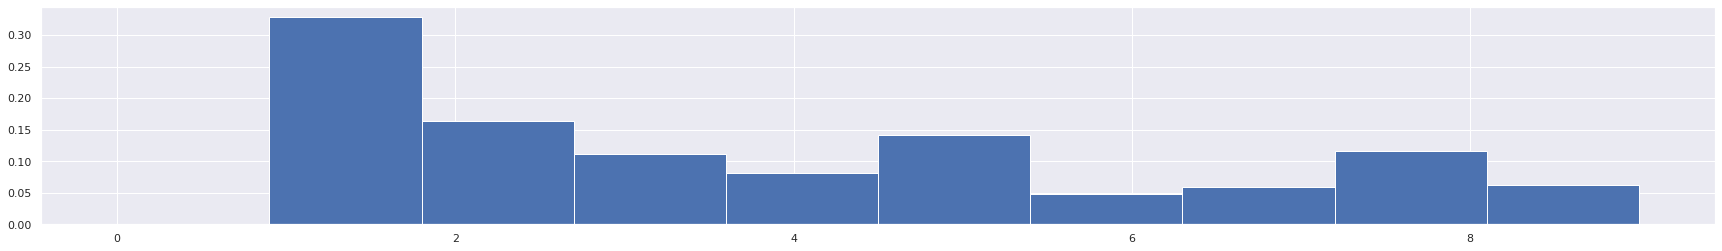

In [ ]:
# we can also do percentages on the Y axis using the density argument to hist()

df['Digit'].hist(density=100)

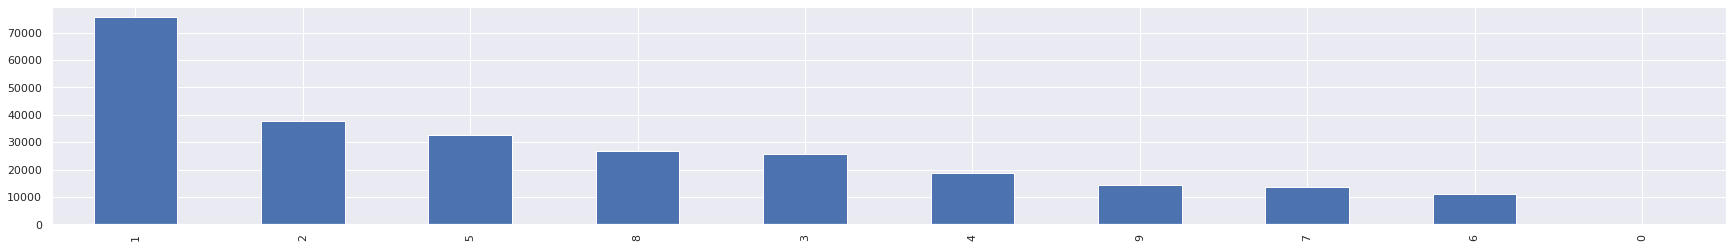

In [ ]:
df['Digit'].value_counts().plot.bar()

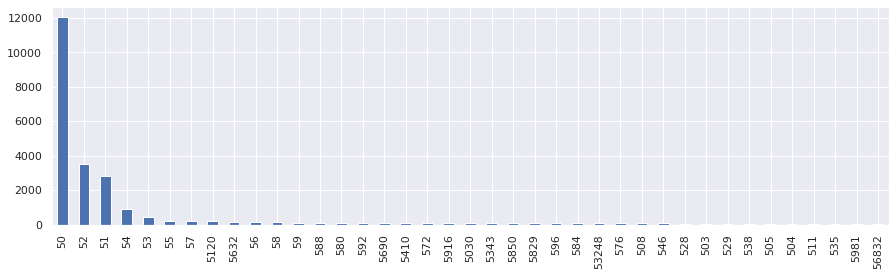

In [ ]:
# Digit 5 and 8 show unexpected high counts. Let's try to find out if there is a particular size starting with 5 or 8 that causes this
#
vc = df[df['Digit']==5]['Size'].value_counts()
vc[vc > 50].plot.bar(figsize =(15,4))

In [ ]:
# so what are those files with size 50?
#
df[df['Size']==50]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders,Folder1,Folder2,Folder3,Digit
53615,--------,2021-07-08 12:41:00,2021-06-10 05:37:00,2021-07-08 12:41:00,50,bth.inf_loc,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,inf_loc,AE812CC2BADDE88505144BB05418B8EC,"[C:, Windows, servicing, LCU, Package_for_Roll...",Windows,servicing,LCU,5
53619,--------,2021-07-08 12:41:00,2021-06-10 05:37:00,2021-07-08 12:41:00,50,bth.inf_loc,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,inf_loc,AE812CC2BADDE88505144BB05418B8EC,"[C:, Windows, servicing, LCU, Package_for_Roll...",Windows,servicing,LCU,5
53623,--------,2021-07-08 12:41:00,2021-06-10 05:37:00,2021-07-08 12:41:00,50,bth.inf_loc,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,inf_loc,338A8D20E479424C83B082B740A581A5,"[C:, Windows, servicing, LCU, Package_for_Roll...",Windows,servicing,LCU,5
53627,--------,2021-07-08 12:41:00,2021-06-10 05:37:00,2021-07-08 12:41:00,50,bth.inf_loc,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,inf_loc,338A8D20E479424C83B082B740A581A5,"[C:, Windows, servicing, LCU, Package_for_Roll...",Windows,servicing,LCU,5
53821,--------,2021-07-08 12:42:00,2021-06-10 05:38:00,2021-07-08 12:42:00,50,p6font.gpd,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,gpd,3AA8786EF0EF6C65E12F43B9AD342995,"[C:, Windows, servicing, LCU, Package_for_Roll...",Windows,servicing,LCU,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245849,---A----,2021-04-22 19:51:00,2021-04-08 19:46:00,2021-07-08 19:36:00,50,{A5A7C794-3D59-41DF-915F-19ACDA526FC9}1036.bin,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,bin,56853935C020A3C5CA327F915B919867,"[C:, Windows, WinSxS, wow64_microsoft-windows-...",Windows,WinSxS,wow64_microsoft-windows-aarsvc_31bf3856ad364e3...,5
245850,---A----,2021-04-22 19:51:00,2021-04-08 19:46:00,2021-07-08 19:36:00,50,{A5A7C794-3D59-41DF-915F-19ACDA526FC9}1040.bin,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,bin,4C2E9FDE33463B9C22A6D478CA6025C0,"[C:, Windows, WinSxS, wow64_microsoft-windows-...",Windows,WinSxS,wow64_microsoft-windows-aarsvc_31bf3856ad364e3...,5
245852,---A----,2021-04-22 19:51:00,2021-04-08 19:47:00,2021-07-08 19:36:00,50,{A5A7C794-3D59-41DF-915F-19ACDA526FC9}1046.bin,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,bin,22CB434D84F29A999F1EB9F92AACDDB3,"[C:, Windows, WinSxS, wow64_microsoft-windows-...",Windows,WinSxS,wow64_microsoft-windows-aarsvc_31bf3856ad364e3...,5
245856,---A----,2021-04-22 19:51:00,2021-04-08 19:49:00,2021-07-08 19:36:00,50,{A5A7C794-3D59-41DF-915F-19ACDA526FC9}2058.bin,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,C:\Windows\WinSxS\wow64_microsoft-windows-aars...,bin,9762F3ACE2015B6631D61F3DA9C05058,"[C:, Windows, WinSxS, wow64_microsoft-windows-...",Windows,WinSxS,wow64_microsoft-windows-aarsvc_31bf3856ad364e3...,5


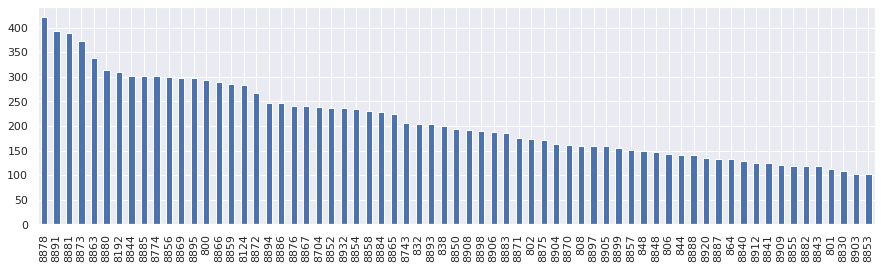

In [ ]:
# quite unexpected. Perhaps there is an error. Reason to further investigate?
#
# and how about the 8?

vc = df[df['Digit']==8]['Size'].value_counts()
vc[vc > 100].plot.bar(figsize =(15,4))

In [ ]:
#very different from the 5 analysis. There is no number starting with 8 that jumps out